## Market Research and Recommendation and Visualization Technique for Business Decision Making 

DQLab sport center adalah toko yang menjual berbagai kebutuhan olahraga seperti Jaket, Baju, Tas, dan Sepatu. Toko ini mulai berjualan sejak tahun 2013, sehingga sudah memiliki pelanggan tetap sejak lama, dan tetap berusaha untuk mendapatkan pelanggan baru sampai saat ini.
Di awal tahun 2019,   manajer toko tersebut merekrut junior DA untuk membantu  memecahkan masalah yang ada di tokonya, yaitu menurunnya pelanggan yang membeli kembali ke tokonya.  Junior DA tersebut pun diberi kepercayaan mengolah data transaksi toko tersebut. Manajer toko mendefinisikan bahwa customer termasuk sudah bukan disebut pelanggan lagi (churn) ketika dia sudah tidak bertransaksi ke tokonya lagi sampai dengan 6 bulan terakhir dari update data terakhir yang tersedia.  
Manajer toko pun memberikan data transaksi dari tahun 2013 sampai dengan 2019 dalam bentuk csv (comma separated value) dengan data_retail.csv dengan jumlah baris 100.000 baris data.


## Hal yang akan dilakukan
1.	Data preparation test
- Importing data: Melakukan import data_retail.csv ke python environment.
- Cleansing data: Melakukan pembersihan dan modifikasi data sehingga siap digunakan untuk analisis lebih lanjut.
2.	Data visualization test: Mendapatkan insight dari hasil visualisasi yang telah dibuat.
3.	Basic stats method test: Mendapatkan insight dari model dan evaluasi model yang sudah dibuat dan diuji.


In [6]:
#mengimport library
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np

## Importing Data dan Inspection
Importlah dataset dari https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/data_retail.csv dan kemudian inspeksilah dataset tersebut dengan
1.	mencetak lima data teratas saja,
2.	mencetak info dataset.


In [7]:
# Download dataset winequality_red.csv di DQLab
!wget -O data_retail.csv https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/data_retail.csv 

--2021-01-11 05:11:51--  https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/data_retail.csv
Resolving dqlab-dataset.s3-ap-southeast-1.amazonaws.com (dqlab-dataset.s3-ap-southeast-1.amazonaws.com)... 52.219.36.227
Connecting to dqlab-dataset.s3-ap-southeast-1.amazonaws.com (dqlab-dataset.s3-ap-southeast-1.amazonaws.com)|52.219.36.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6324421 (6.0M) [text/csv]
Saving to: ‘data_retail.csv’

data_retail.csv     100%[===================>]   6.03M  4.56MB/s    in 1.3s    

2021-01-11 05:11:53 (4.56 MB/s) - ‘data_retail.csv’ saved [6324421/6324421]



In [8]:
# Load dataset
df = pd.read_csv('data_retail.csv', delimiter=';')
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [9]:
print('info dataset: ')
df.info()

info dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


## Data Cleansing
Dua kolom yang menunjukkan terjadinya transaksi tidak bertipe datetime, maka ubahlah kedua kolom tersebut ke tipe data datetime. Kemudian cetaklah kembali 5 data teratas dari dataframe df dan juga tipe data masing-masing kolomnya.


In [10]:
# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')

# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
print('Lima data teratas:')
print(df.head())
print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  ...  Average_Transaction_Amount Count_Transaction
0   1        1  ...                     1467681                22
1   2        2  ...                     1269337                41
2   3        3  ...                      310915                30
3   4        4  ...                      722632                27
4   5        5  ...                     1775036                25

[5 rows x 8 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null 

In [11]:
print(df)

           no  Row_Num  ...  Average_Transaction_Amount Count_Transaction
0           1        1  ...                     1467681                22
1           2        2  ...                     1269337                41
2           3        3  ...                      310915                30
3           4        4  ...                      722632                27
4           5        5  ...                     1775036                25
...       ...      ...  ...                         ...               ...
99995   99996    99996  ...                      298662                 1
99996   99997    99997  ...                      349556                 1
99997   99998    99998  ...                      598013                 1
99998   99999    99999  ...                     1208591                 1
99999  100000   100000  ...                      486710                 1

[100000 rows x 8 columns]


In [12]:
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25


## Churn Customers
Untuk menentukan churn customers sesuai definisi yang telah diberikan, carilah
1.	transaksi paling terakhir kapan dilakukan
2.	klasifikasikanlah mana customer yang berstatus churn dan mana yang tidak.


In [13]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

2019-02-01 23:57:57.286000013


In [14]:
# Klasifikasikan customer yang berstatus churn atau tidak
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False
print('Lima data teratas:')
print(df.head())

Lima data teratas:
   no  Row_Num  ...  Count_Transaction is_churn
0   1        1  ...                 22    False
1   2        2  ...                 41    False
2   3        3  ...                 30    False
3   4        4  ...                 27    False
4   5        5  ...                 25    False

[5 rows x 9 columns]


In [15]:
# Hapus kolom-kolom yang tidak diperlukan
del df['no']
del df['Row_Num']

# Cetak lima data teratas
print(df.head())

   Customer_ID Product  ... Count_Transaction is_churn
0        29531   Jaket  ...                22    False
1        29531  Sepatu  ...                41    False
2       141526     Tas  ...                30    False
3       141526   Jaket  ...                27    False
4        37545  Sepatu  ...                25    False

[5 rows x 7 columns]


## Customer acquisition by year
membuat visualisasi data berupa trend of customer acquisition by year dengan meggunakan bar chart. Untuk itu buatlah feature/kolom tambahan yang merupakan tahun dari First_Transaction dan tahun dari Last_Transaction masing-masingnya dengan nama Year_First_Transaction dan Year_Last_Transaction sebelum melakukan visualisasi.


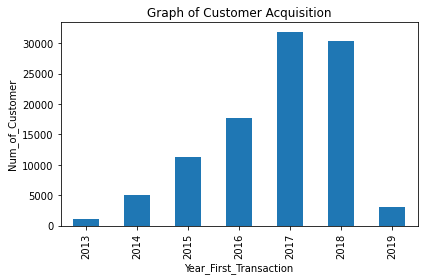

In [16]:
import matplotlib.pyplot as plt
# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()


In [17]:
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False,2016,2018
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False,2014,2018
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False,2017,2019
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False,2017,2019
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False,2015,2018


## Transaction by year
Visualisasikanlah trend jumlah transaksi per tahunnya


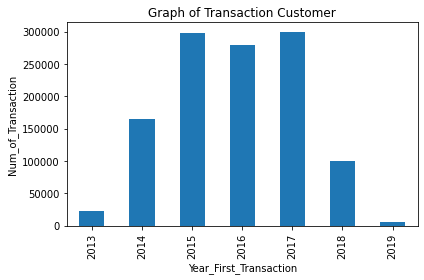

In [18]:
import matplotlib.pyplot as plt

plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()


## Average transaction amount by year
Dengan menggunakan seaborn pointplot, visualisasikanlah tren dari tahun ke tahun rata-rata jumlah transaksi untuk tiap-tiap produknya


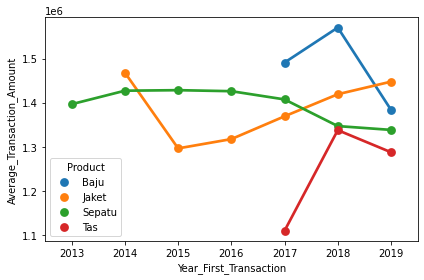

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(),
x='Year_First_Transaction',
y='Average_Transaction_Amount',
hue='Product')
plt.tight_layout()
plt.show()


## Proporsi churned customer untuk setiap produk
Dari sisi churned customer, khususnya untuk melihat seberapa besar proporsi churned customer untuk tiap-tiap produk dapat diketahui insight-nya melalui pie chart. Visualisasikan pie chartnya untuk keempat produk yang dimaksudkan.


<Figure size 432x288 with 0 Axes>

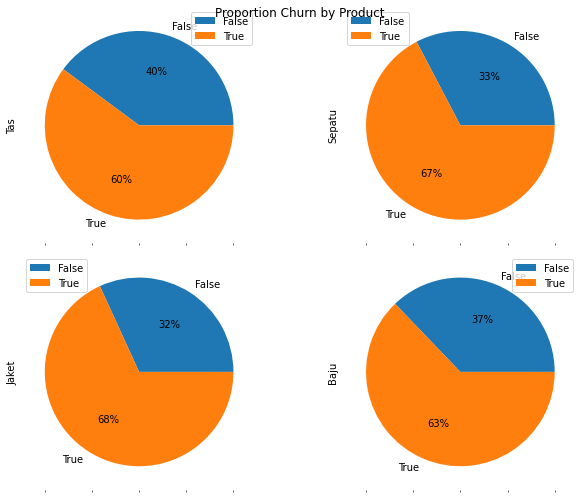

In [20]:
import matplotlib.pyplot as plt

plt.clf()
# Melakukan pivot data
df_piv = df.pivot_table(index='is_churn',
columns='Product',
values='Customer_ID',
aggfunc='count',
fill_value=0)
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
figsize=(10, 7),
layout=(-1, 2),
autopct='%1.0f%%',
title='Proportion Churn by Product')
plt.tight_layout()
plt.show()


## Distribusi kategorisasi count transaction
Selanjutnya akan melakukan visualisasi dari distribusi kategorisasi count transaction. Kategorisasi ini dilakukan dengan mengelompokkan jumlah transaksi.


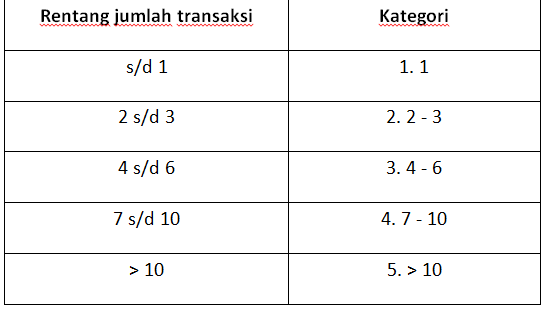

tambahkan kolom baru untuk kategori ini dengan nama Count_Transaction_Group, maka visualisasikanlah dengan bar chart. 




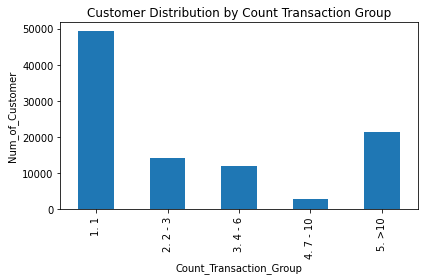

In [25]:
import matplotlib.pyplot as plt
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
  if row['Count_Transaction'] == 1:
    val = '1. 1'
  elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
    val ='2. 2 - 3'
  elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
    val ='3. 4 - 6'
  elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
    val ='4. 7 - 10'
  else:
    val ='5. >10'
  return val
  
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)
df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()


## Distribusi kategorisasi average transaction amount
Selanjutnya, akan melakukan visualisasi dari distribusi kategorisasi average transaction amount. Kategorisasi ini dilakukan dengan mengelompokkan rata-rata besar transaksi seperti yang diperlihatkan oleh tabel berikut:

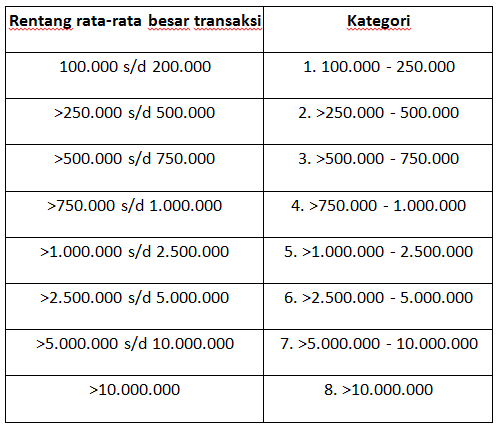

Setelah ditambahkan kolom baru untuk kategori ini dengan nama Average_Transaction_Amount_Group, maka visualisasikanlah dengan bar chart. 


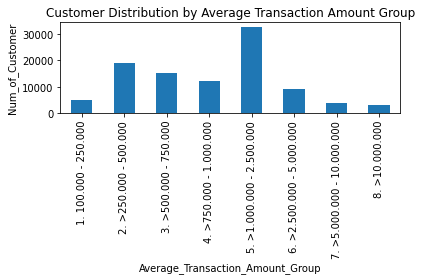

In [27]:
import matplotlib.pyplot as plt

plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
  if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
    val ='1. 100.000 - 250.000'
  elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
    val ='2. >250.000 - 500.000'
  elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
    val ='3. >500.000 - 750.000'
  elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
    val ='4. >750.000 - 1.000.000'
  elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
    val ='5. >1.000.000 - 2.500.000'
  elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
    val ='6. >2.500.000 - 5.000.000'
  elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
    val ='7. >5.000.000 - 10.000.000'
  else:
    val ='8. >10.000.000'
  return val

# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()


## Feature Columns dan Target
Di bagian ini, selanjutnya akan menentukan feature columns dari dataset yang dimiliki, di sini dipilih kolom Average_Transaction_Amount, Count_Transaction, dan Year_Diff. Akan tetapi, kolom terakhir belum ada. Silakan dicreate dahulu kolom Year_Diff ini dan kemudian assign dataset dengan feature columns ini sebagai variabel independent X. 
Untuk target tentunya persoalan costumer dengan kondisi churn atau tidak, assign dataset untuk target ini ke dalam variabe dependent y.


In [40]:
# Feature column: Year_Diff
df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

In [29]:
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction,Count_Transaction_Group,Average_Transaction_Amount_Group,Year_Diff
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False,2016,2018,5. >10,5. >1.000.000 - 2.500.000,2
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False,2014,2018,5. >10,5. >1.000.000 - 2.500.000,4
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False,2017,2019,5. >10,2. >250.000 - 500.000,2
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False,2017,2019,5. >10,3. >500.000 - 750.000,2
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False,2015,2018,5. >10,5. >1.000.000 - 2.500.000,3


In [49]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['is_churn'] = labelencoder.fit_transform(df['is_churn'])

In [50]:
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction,Count_Transaction_Group,Average_Transaction_Amount_Group,Year_Diff
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,0,2016,2018,5. >10,5. >1.000.000 - 2.500.000,2
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,0,2014,2018,5. >10,5. >1.000.000 - 2.500.000,4
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,0,2017,2019,5. >10,2. >250.000 - 500.000,2
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,0,2017,2019,5. >10,3. >500.000 - 750.000,2
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,0,2015,2018,5. >10,5. >1.000.000 - 2.500.000,3


## Split X dan y ke dalam bagian training dan testing
Setelah variabel independent X dan variabel dependent y selesai dilakukan, maka pecahlah X dan y ke dalam bagian training dan testing. Bagian testing 25% dari jumlah entri data.


In [51]:
from sklearn.model_selection import train_test_split
# Features variable
X = df[feature_columns] 

# Target variable
y = df['is_churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Train, predict dan evaluate
Langkah selanjutnya akan membuat model menggunakan Linear Regression, inisialisasilah model, fit, dan kemudian evaluasi model dengan menggunakan confusion matrix.


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred=logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)


Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


## Visualisasi Confusion Matrix
Confusion matrix yang telah dihitung sebelumnya dapat divisualisasikan dengan menggunakan heatmap dari seaborn. Untuk itu tampilkanlah visualisasi dari confusion matrix ini.


<Figure size 432x288 with 0 Axes>

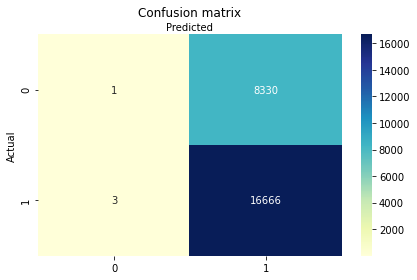

In [53]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


## Accuracy, Precision, dan Recall
Kemudian, hitunglah nilai accuracy, precission dan recall berdasarkan nilai target sesungguhnya dan nilai target hasil prediksi.


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))


Accuracy : 0.66668
Precision: 0.66668
Recall : 0.66668
